# 1. 사진 모으기

### 해당 파일은 퍼실님의 도움으로 받아서 사용했습니다.

file_list: ['김대명.jpeg', '진.jpg', '전소미.jpg', '주진모(올드).jpg', '문재인.jpeg', '하승진.jpg', '돈스파이크.jpg', '박찬욱.jpeg', '개리.jpg', '박찬호.jpg', '이대형.jpg', '김남주.jpeg', '이대호.jpeg', 'image5.png', '무라니시.png', '이진호.jpeg', '김영삼.jpeg', '태연.jpg', '한효주.jpg', '백윤식.png', '아이즈원김채원.jpg', '카이.jpg', '트와이스다현.jpeg', '주호민.jpeg', '황정민.jpg', '아이즈원조유리.jpeg', '조달환.png', '유아.jpg', '신비.jpg', '딕헌터.jpeg', '태양.jpeg', '정수빈.jpg', '배성재.jpg', '차두리.jpeg', '레인보우재경.jpg', '로다주.jpeg', '제니.jpg', '트와이스미나.jpg', '미미.jpg', '한기범.jpg', 'image3.png', '박성호.jpg', '삭제요망1.jpeg', '김C.jpeg', '케빈 스페이시.jpeg', '장원준.jpeg', '도지한.jpg', '한석규.jpg', 'trump.jpg', '택연.jpg', '이근대위.jpeg', '정국.jpg', '손호준.jpeg', '뷔.png', '마동석.jpeg', '이용진.jpg', '개코.jpeg', '정민철.jpg', '이민호.jpeg', '방시혁.jpeg', '리암 니슨.png', '벤 에플렉.jpeg', '슬기.jpg', '손예진.jpeg', '조승우.jpeg', '유희열.jpeg', '온앤오프라운.jpg', '브래들리 쿠퍼.jpg', '류승룡.jpeg', '손흥민.jpg', '차범근.jpeg', '온앤오프와이엇.jpg', '제이홉.jpg', '여자아이들수진.jpeg', '지코.jpg', '서현진.jpg', '류준열.jpg', '박재범.jpg', '윤도현.png', '제이콥 배털론.jpg', '트와이스모모.jpeg', '조원희.jpg', '크리스탈.j

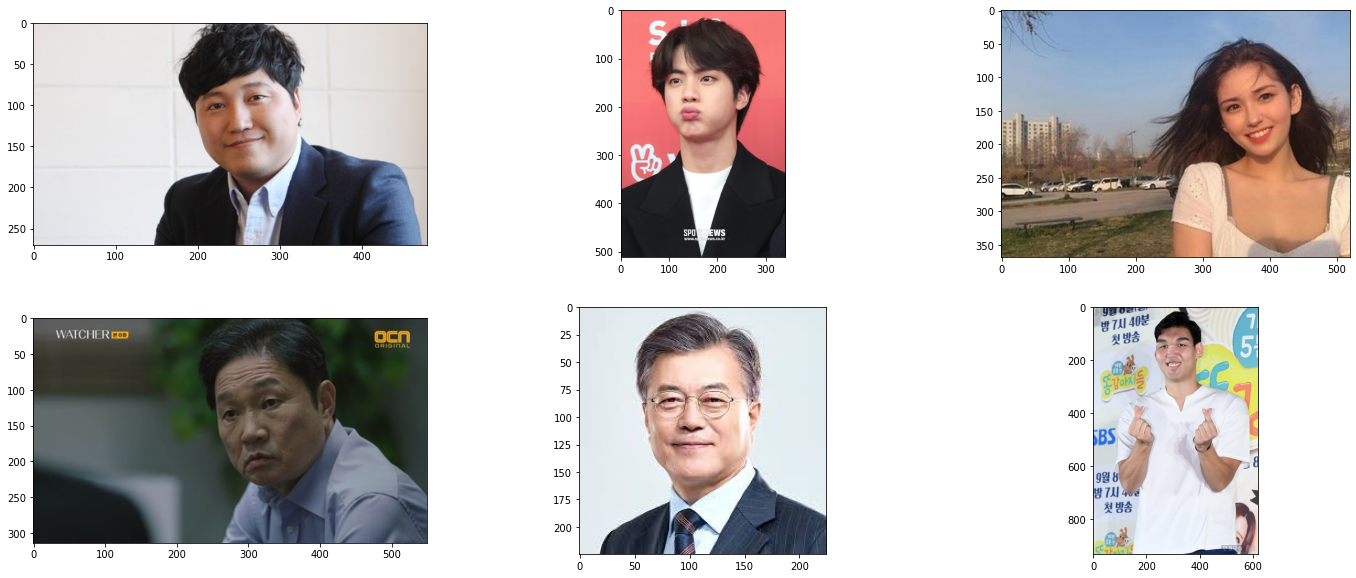

In [1]:
import os

dir_path = os.getenv('HOME')+'/aiffel/face_embedding/image/celebrity'
file_list = os.listdir(dir_path)

print ("file_list: {}".format(file_list))

import matplotlib.pyplot as plt
import matplotlib.image as img

#Set figsize here
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(24,10))

# flatten axes for easy iterating
for i, ax in enumerate(axes.flatten()):
  image = img.imread(dir_path+'/'+file_list[i])
  ax.imshow(image)
plt.show()

fig.tight_layout()

### 파일 리스트와 사진을 출력해보았습니다.

# 2. 얼굴 영역 자르기

[(650, 1389, 1316, 724)]


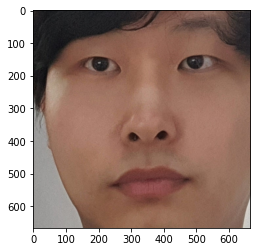

In [2]:
import face_recognition
import os
%matplotlib inline
import matplotlib.pyplot as plt

image_path = os.getenv('HOME')+'/aiffel/face_embedding/image/celebrity/image5.png'
image = face_recognition.load_image_file(image_path)
face_locations = face_recognition.face_locations(image)

print(face_locations)  # 이미지에서 얼굴 영역의 좌표를 출력합니다.

a, b, c, d = face_locations[0]
cropped_face = image[a:c,d:b,:]

plt.imshow(cropped_face)   # 이미지에서 얼굴영역만 잘라낸 cropped_face를 그려 봅니다.

## 찍은 사진에서 얼굴 영역 좌표를 출력하고 얼굴영역이미지를 출력해보았습니다.

## 얼굴 영역을 자르는 함수를 만들어 사용해 보겠습니다. 

In [3]:
import face_recognition
import os

def get_cropped_face(image_path):
    image = face_recognition.load_image_file(image_path)
    face_locations = face_recognition.face_locations(image)
    try:
        a, b, c, d = face_locations[0]
    except IndexError as e:
        print('index error', image_path)
        print(e)
        return None
    except Exception as e:
        print('index error', image_path)
        print(e)
        return None
    else:
        cropped_face = image[a:c,d:b,:]
        return cropped_face

## 이 함수를 만들때 같은 조원의 도움을 받았습니다.

### 파이썬에서 권장하는 try, except 문법인데 사진중에 오류가 나는 사진이 무엇인지 출력해주고 오류가 나지 않는 사진은 얼굴영역을 출력해 줍니다.

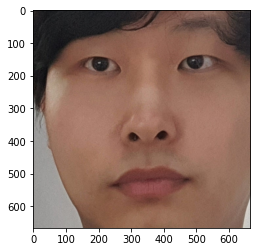

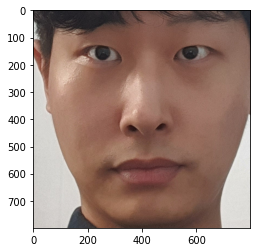

In [4]:
image_path_1 = os.getenv('HOME')+'/aiffel/face_embedding/image/celebrity/image5.png'
image_path_2 = os.getenv('HOME')+'/aiffel/face_embedding/image/celebrity/image10.png'

cropped_face_1 = get_cropped_face(image_path_1)
plt.imshow(cropped_face_1)
plt.show()

cropped_face_2 = get_cropped_face(image_path_2)
plt.imshow(cropped_face_2)
plt.show()

## 모델을 학습하기 전 동일 인물을 얼마나 잘 구분 하는지 두 사진의 거리를 측정해 보려고 합니다.

## 위에 쓰인 두 사진을 비교해 보겠습니다.

# 3. 얼굴 영역의 임베딩 추출하기

### 원리는 사진의 임베딩 벡터를 구해 두 벡터의 거리를 계산하는것입니다.

In [7]:
image_file = os.path.join(dir_path, 'image5.png')
face = get_cropped_face(image_file)   # 얼굴 영역을 구하는 함수(이전 스텝에서 구현)

# 얼굴 영역을 가지고 얼굴 임베딩 벡터를 구하는 함수
def get_face_embedding(face):
    return face_recognition.face_encodings(face)

embedding = get_face_embedding(face)  
embedding

[array([-0.04373932,  0.12637851,  0.01963299, -0.06371951, -0.16018391,
         0.03262881, -0.09594007, -0.07356783,  0.13436812, -0.10193681,
         0.19524747, -0.06139651, -0.18164058, -0.08156218, -0.1159471 ,
         0.20953374, -0.14220259, -0.14844203,  0.01325594, -0.00788382,
         0.12613027,  0.04885156, -0.02821427, -0.0032892 , -0.07585921,
        -0.30291045, -0.08176196, -0.07520885,  0.02454432, -0.0840909 ,
        -0.01980237,  0.01902823, -0.17209689, -0.03132982,  0.06375315,
         0.04403756, -0.04214587, -0.05406379,  0.15722884, -0.01606551,
        -0.21156842, -0.01470851,  0.10286691,  0.20008326,  0.17051876,
         0.04704408,  0.03185743, -0.14365801,  0.08138804, -0.1290925 ,
         0.07248938,  0.15390117,  0.08670884,  0.08301007,  0.03051033,
        -0.14504778,  0.03020105,  0.14599752, -0.08139688,  0.06732394,
         0.11582096, -0.04393666, -0.06196905, -0.06585088,  0.21099201,
         0.02331604, -0.10315419, -0.22054693,  0.1

### 얼굴 영역 임베딩 벡터추출 함수를 짜고 첫번째 사진의 임베딩 벡터를 출력해 보았습니다.

### 위 함수를 이용해 임베딩 벡터를 딕셔너리 안에 모아두는 함수를 쓰겠습니다.

In [8]:
def get_face_embedding_dict(dir_path):
    file_list = os.listdir(dir_path)
    embedding_dict = {}
    cropped_dict = {}
    for file in file_list:
        img_path = os.path.join(dir_path, file)
        face = get_cropped_face(img_path)
        embedding = get_face_embedding(face)
        if len(embedding) > 0:  
        # 얼굴영역 face가 제대로 detect되지 않으면  len(embedding)==0인 경우가 발생하므로 
        # os.path.splitext(file)[0]에는 이미지파일명에서 확장자를 제거한 이름이 담깁니다. 
            embedding_dict[os.path.splitext(file)[0]] = embedding[0]
            cropped_dict[os.path.splitext(file)[0]] = face
        
    return embedding_dict, cropped_dict

### 예제에서 사용했던 함수에서 얼굴영역이미지도 모아두는 딕셔너리를 만들어서 나중에 사진을 비교 할때 사용하겠습니다.

In [12]:
embedding_dict, cropped_dict = get_face_embedding_dict(dir_path)
embedding_dict['image10']

array([-0.05443304,  0.11593226,  0.00563015, -0.01786868, -0.12848853,
        0.00350808, -0.09042729, -0.09099098,  0.11575048, -0.07159911,
        0.17076191, -0.0668042 , -0.16886501, -0.08193552, -0.09427172,
        0.19651565, -0.16200325, -0.1493874 ,  0.01310985, -0.00059644,
        0.10289955,  0.01509351, -0.02800994, -0.00176674, -0.0748583 ,
       -0.29150364, -0.07973495, -0.08049204,  0.0549803 , -0.06908263,
       -0.02586785,  0.02576295, -0.16993167, -0.03516746,  0.0716096 ,
        0.05670141, -0.05595732, -0.07285045,  0.164363  , -0.0324724 ,
       -0.21849784, -0.00408942,  0.08632526,  0.21089131,  0.18058825,
        0.01647593,  0.03660422, -0.15253305,  0.10756142, -0.10723516,
        0.05223537,  0.16382943,  0.06220303,  0.10428109,  0.04377291,
       -0.14470318,  0.02966199,  0.1362033 , -0.0684911 ,  0.05799096,
        0.10693594, -0.02283695, -0.01028099, -0.08908839,  0.20246878,
       -0.01219911, -0.08271199, -0.23875709,  0.1732475 , -0.11

### 두번째 사진의 임베딩 벡터를 출력해보았습니다.

### 두 사진의 임베딩 벡터를 넘파이를 사용해 거리를 측정해 보겠습니다.

In [33]:
import numpy as np

A = np.array([-0.04373932,  0.12637851,  0.01963299, -0.06371951, -0.16018391,
         0.03262881, -0.09594007, -0.07356783,  0.13436812, -0.10193681,
         0.19524747, -0.06139651, -0.18164058, -0.08156218, -0.1159471 ,
         0.20953374, -0.14220259, -0.14844203,  0.01325594, -0.00788382,
         0.12613027,  0.04885156, -0.02821427, -0.0032892 , -0.07585921,
        -0.30291045, -0.08176196, -0.07520885,  0.02454432, -0.0840909 ,
        -0.01980237,  0.01902823, -0.17209689, -0.03132982,  0.06375315,
         0.04403756, -0.04214587, -0.05406379,  0.15722884, -0.01606551,
        -0.21156842, -0.01470851,  0.10286691,  0.20008326,  0.17051876,
         0.04704408,  0.03185743, -0.14365801,  0.08138804, -0.1290925 ,
         0.07248938,  0.15390117,  0.08670884,  0.08301007,  0.03051033,
        -0.14504778,  0.03020105,  0.14599752, -0.08139688,  0.06732394,
         0.11582096, -0.04393666, -0.06196905, -0.06585088,  0.21099201,
         0.02331604, -0.10315419, -0.22054693,  0.17064524, -0.12060631,
        -0.11574244,  0.0445272 , -0.14237502, -0.15611242, -0.25138447,
         0.00579539,  0.38888165,  0.10046732, -0.18483293,  0.06079087,
         0.04000214,  0.0149432 ,  0.12522539,  0.15270799, -0.01468411,
        -0.0281281 , -0.05348937, -0.01114066,  0.21456295, -0.0650062 ,
        -0.01991033,  0.17604637, -0.04518082,  0.06174905,  0.00968432,
         0.02251125, -0.01890727,  0.0836217 , -0.07355542, -0.00203795,
         0.04636164, -0.10234752, -0.03730189,  0.14387821, -0.12995468,
         0.10367098, -0.03025457,  0.07824013, -0.00068094,  0.01606452,
        -0.10636798, -0.01649692,  0.16754098, -0.16924749,  0.26229295,
         0.15043657,  0.04679719,  0.08733713,  0.16667469,  0.13923255,
         0.06579325, -0.06307396, -0.2454242 , -0.05021416,  0.04669037,
        -0.08822962,  0.04517175,  0.02309025])

B = np.array([-0.05443304,  0.11593226,  0.00563015, -0.01786868, -0.12848853,
        0.00350808, -0.09042729, -0.09099098,  0.11575048, -0.07159911,
        0.17076191, -0.0668042 , -0.16886501, -0.08193552, -0.09427172,
        0.19651565, -0.16200325, -0.1493874 ,  0.01310985, -0.00059644,
        0.10289955,  0.01509351, -0.02800994, -0.00176674, -0.0748583 ,
       -0.29150364, -0.07973495, -0.08049204,  0.0549803 , -0.06908263,
       -0.02586785,  0.02576295, -0.16993167, -0.03516746,  0.0716096 ,
        0.05670141, -0.05595732, -0.07285045,  0.164363  , -0.0324724 ,
       -0.21849784, -0.00408942,  0.08632526,  0.21089131,  0.18058825,
        0.01647593,  0.03660422, -0.15253305,  0.10756142, -0.10723516,
        0.05223537,  0.16382943,  0.06220303,  0.10428109,  0.04377291,
       -0.14470318,  0.02966199,  0.1362033 , -0.0684911 ,  0.05799096,
        0.10693594, -0.02283695, -0.01028099, -0.08908839,  0.20246878,
       -0.01219911, -0.08271199, -0.23875709,  0.1732475 , -0.1178771 ,
       -0.09589376,  0.08079831, -0.12934917, -0.17387858, -0.24157192,
        0.01385741,  0.38225472,  0.11890292, -0.15910004,  0.08887829,
        0.00271463, -0.03098757,  0.11893907,  0.15137218,  0.01185208,
        0.00514096, -0.06593546, -0.03550023,  0.23842624, -0.05972196,
       -0.02068204,  0.17125002, -0.04692705,  0.04200932,  0.01527377,
        0.00056194, -0.04895359,  0.087691  , -0.09196871, -0.05390592,
        0.03895043, -0.10757349, -0.01484528,  0.14093913, -0.11208078,
        0.10559224, -0.01149297,  0.11135846, -0.00242653,  0.03040094,
       -0.11037913, -0.01650754,  0.16001771, -0.19864272,  0.26430756,
        0.12618968,  0.08251407,  0.07356712,  0.15419264,  0.13582289,
        0.03866135, -0.05188262, -0.21872045, -0.02815086,  0.04205134,
       -0.04391446,  0.03722396,  0.0333617 ])

In [32]:
distances = np.linalg.norm(A-B, ord=2)
print("Distance between A and B: {}".format(distances))

Distance between A and B: 0.220291871112899


### 첫번째 사진과 두번째 사진의 거리를 구해봤습니다.

### 컴퓨터는 거리를 어떻게 계산하는지 L1 distance와 L2 distance를 잠시 살펴보겠습니다.

![image](https://user-images.githubusercontent.com/84653776/137304307-92d11970-d0ce-4e4b-977c-70f2da64bfea.png)


### L1은 단순히 차이를 더해주고, L2는 차이를 제곱해서 더한뒤 루트를 사용해줍니다.

In [16]:
import numpy as np

x = np.array([1,2,3,4,5])
y = np.array([2,3,4,5,6])

print(np.linalg.norm(y-x, ord=1))  #L1 distance
print(np.linalg.norm(y-x, ord=2))  #L2 distance

5.0
2.23606797749979


### X와 Y 벡터의 L1 거리는 각각 성분의 차이를 더해서 5가 나오고

### L2 거리는 성분의 차이를 제곱해 루트를 해줬기 때문에 루트5의 근사값이 나왔습니다.

In [17]:
def get_distance(name1, name2):
    return np.linalg.norm(embedding_dict[name1]-embedding_dict[name2], ord=2)

get_distance('image5', 'image10')

0.22029186452175756

### 이제 일반화를 위해 거리를 측정하는 함수를 만들었습니다. 위에서 구한 거리와 동일하게 나왔습니다.

In [19]:
# name1과 name2의 거리를 비교하는 함수를 생성하되, name1은 미리 지정하고, name2는 호출시에 인자로 받도록 합니다.
def get_sort_key_func(name1):
    def get_distance_from_name1(name2):
        return get_distance(name1, name2)
    return get_distance_from_name1

sort_key_func = get_sort_key_func('image5')   
# 이렇게 생성된 함수 sort_key_func는 sort_key_func('obama') 라고 호출할 때 trump와 obama 사이의 임베딩 벡터 거리를 계산합니다.

### 이제 모았던 모든 사진의 임베딩 벡터를 출력해 보겠습니다.

In [36]:
### sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0])) 너무 길어 일부만 보여드리겠습니다.

![image](https://user-images.githubusercontent.com/84653776/137301259-79456784-03b0-4ca8-a89e-00694867fa3a.png)

# 4. 모은 연예인 사진과 비교해 보기

### 이제 위 거리 함수를 이용해 특정 사진과 거리가 가까운 사진 5개를 뽑는 함수를 만들어 보겠습니다.

In [25]:
def get_nearest_face(name, top=5):
    sort_key_func = get_sort_key_func(name)
    sorted_faces = sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))
    
    for i in range(top+1):
        if i == 0 :   # 첫번째로 나오는 이름은 자기 자신일 것이므로 제외합시다. 
            continue
        if sorted_faces[i]:
            print('순위 {} : 이름({}), 거리({})'.format(i, sorted_faces[i][0], sort_key_func(sorted_faces[i][0])))
            
    return sorted_faces

### 가깝다고 인식한 사진을 시각화 하기 위해 이미지를 출력하는 함수를 만들어 보겠습니다.

순위 1 : 이름(image10), 거리(0.22029186452175756)
순위 2 : 이름(배성재), 거리(0.402090997738786)
순위 3 : 이름(류현진), 거리(0.4031940263810341)
순위 4 : 이름(디오), 거리(0.4287219065834159)
순위 5 : 이름(박건우), 거리(0.42879872251040035)


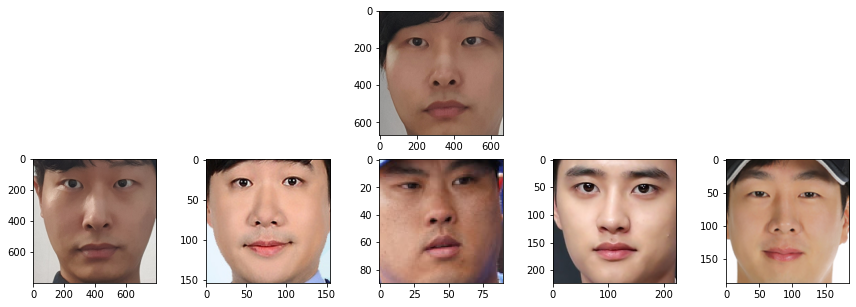

In [58]:
def get_nearest_face_images(sorted_faces, top=5):
    fig = plt.figure(figsize=(15, 5))
    fig.add_subplot(2, top, 3)
    plt.imshow(cropped_dict[sorted_faces[0][0]])
    for i in range(top):
        fig.add_subplot(2, top, i+6)
        plt.imshow(cropped_dict[sorted_faces[i+1][0]])
        
sorted_faces = get_nearest_face('image5')
        
get_nearest_face_images(sorted_faces)

# ... 모델의 성능이 별로 인것 같습니다.

# 회고

### 이번 노드를 진행하면서 어려웠던 점은 얼굴 영역 자르기를 위해 함수를 만드는 과정중 잘못된 파일이 있으면 임베딩 벡터가 출력 되지 않아 오류가 났던 점이였다.

### 그래서 이 오류 때문에 조원들과 토론을 했는데, 함수를 짤때 처음부터 예외 처리를 생각하는게 좋다라는걸 알게 되었고 이를 활용해 오류가난 파일도 찾는 코드도 찾아 이를 활용해 오류를 수정했다. 앞으로 이를 활용해 함수를 만들때 도움이 많이 될것 같다.

### 두번째로 matplotlib을 활용해 시각화 자료를 만드는 것이였다. 익숙한 모듈도 아니였고 함수를 만들지 않고 한장 한장 출력해 보았더니 이미지를 비교하기에 시각적으로 좋지 않았다.

### 그래서 함수를 만들어서 얼굴 사진을 비교하기 좋게 출력하는 함수를 만들때 사진을 비교하는것보다 얼굴영역만 출력하는게 시각화하기 좋다고 생각해서 얼굴영역 딕셔너리를 저장한 다음 위에서 열굴 영역을 자르고 출력하는것까지 해보았습니다.

### 처음 예제를 할때 이름만 나오는것 보다 이미지가 같이 나오니 보기 좋았고 시각화의 중요성을 알게 되었습니다.